# Описание проекта.


Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Структура проекта.

* **Первый шаг. Изучение общей информации о данных.**


* **Второй шаг. Предобработка данных.**
    * Приведение названий столбцов к нижнему регистру.
    * Преобразование данных в столбцах к нужному типу.
    * Обработка пропусков.
    * Создание отдельного столбца с суммарными продажами во всех регионах.
    
    
* **Третий шаг. Исследовательский анализ данных.**
    * Сколько игр выпускалось в разные годы?
    * Зависимость продаж от платформы.
    * Выбор актуального периода для прогнозирования.
    * Удаление данных за неактуальный период.
    * Выбор потенциально прибыльных платформ.
    * Построение графика *ящик с усами* по глобальным продажам игр в разбивке по платформам.
    * Влияние отзывов пользователей и критиков на продажи. Построение диаграммы рассеяния и подсчет корреляции.
    
    
* **Четвертый шаг. Составление портрета пользователя для каждого региона.**
    * Самые популярные платформы в каждом регионе.
    * Самые популярные жанры в каждом регионе.
    * Самые частовстречающиеся рейтинги в каждом регионе.
    
    
* **Пятый шаг. Проверка гипотез.**
    * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    
    
* **Шестой шаг. Вывод.**

# Первый шаг. Изучение общей информации о данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

Импорт библиотек *pandas*, *numpy*, *matplotlib* и *scipy*.

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Описание данных:**
* Name — название игры.
* Platform — платформа.
* Year_of_Release — год выпуска.
* Genre — жанр игры.
* NA_sales — продажи в Северной Америке (миллионы проданных копий).
* EU_sales — продажи в Европе (миллионы проданных копий).
* JP_sales — продажи в Японии (миллионы проданных копий).
* Other_sales — продажи в других странах (миллионы проданных копий).
* Critic_Score — оценка критиков (максимум 100).
* User_Score — оценка пользователей (максимум 10).
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Вывод пяти первых строк датафрейма.

**Были подключены необходимые для работы библиотеки, описаны данные в датасете.**

# Второй шаг. Предобработка данных.

In [4]:
games.columns = games.columns.str.lower()

Теперь названия всех столбцов записаны в нижнем регистре.

In [5]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

Типы данных были изменены в столбцах *year_of_release* и *critic_score* с *float64* на *Int64*. В данных столбцах были указаны целочисленные значения, следовательно оставлять тип данных *float64* нет смысла.

In [6]:
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Количество пропусков в разных столбцах: слева название столбца, справа - количество пропусков в этом столбце.

In [7]:
games = games.query('name.notnull()')
games = games.query('year_of_release.notnull()')
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan
games['user_score'] = games['user_score'].astype('float')

In [8]:
games.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Я решил не заполнять пропуски, потому что в аналитическом проекта особого смысла нет. В то же время, я удалил строки с пропусками в столбцах *name* и *year_of_release*. Пропусков было немного, при этом набор данных стал чище. 

Значение *tbd* **(to be determined)** в столбце *user_score* было заменено на *nan* (считаем, что это пропуск) для дальнейшего анализа. Также тип данных столбца *user_score* был изменен на *float64*.

К пропускам в столбцах *critic_score* и *user_score* могло привести малое количество отзывов об играх, в следствие чего у игры не было рейтинга. Причиной пропусков в столбцах *name* и *year_of_release* могла быть ошибка при выгрузке данных.

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [10]:
games['total_sales'] = (games['na_sales'] 
                     + games['eu_sales'] 
                     + games['jp_sales'] 
                     + games['other_sales'])

Создание столбца *total_sales*, который содержит в себе сумму всех продаж по разным регионам.

# Третий шаг. Исследовательский анализ данных.

In [12]:
games['year_of_release'].value_counts(ascending=False)

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

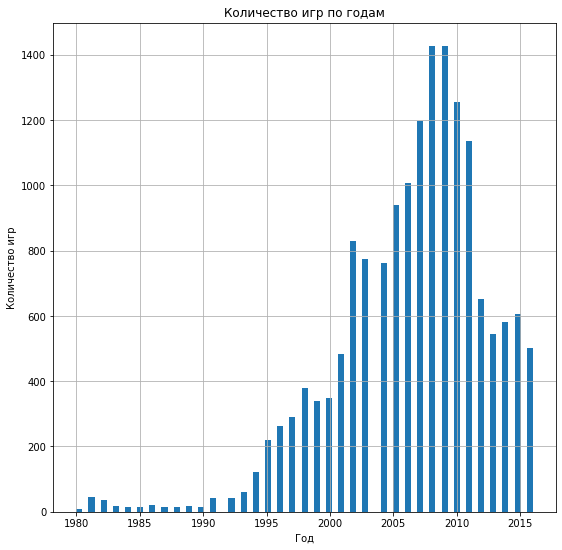

In [13]:
b = len(games['year_of_release'].value_counts()) * 2 + 1
year_hist = games['year_of_release'].plot(kind='hist', 
                                          figsize=(9, 9),
                                          title='Количество игр по годам',
                                          bins=b,
                                          grid=True);
year_hist.set_xlabel('Год');
year_hist.set_ylabel('Количество игр');

In [14]:
pd.pivot_table(games, values='platform', index='year_of_release', aggfunc=lambda x: len(x.unique()))

,platform
year_of_release,
1980,1
1981,1
1982,1
1983,2
1984,2
1985,4
1986,2
1987,2
1988,4


С каждым годом количество игровых платформ увеличивалось.

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64


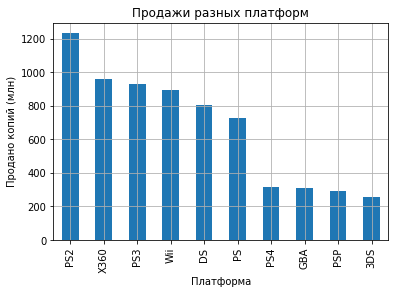

In [15]:
games_pltf = games.groupby(by=['platform'])['total_sales'].sum().sort_values(ascending=False).head(10)
print(games_pltf)

games_pltf.plot(kind='bar',
                title='Продажи разных платформ',
                ylabel='Продано копий (млн)',
                xlabel='Платформа',
                grid=True);

Десять платформ с наибольшими суммарными продажами за все время.

**Жизненный цикл современных платформ от старта релизов до их сведения к минимуму составляет в среднем 5-6 лет. В таком случае, для оценки платформ хватит как раз половины их жизненного цикла (2-3 года). В качестве актуального периода берем данные за 2015 и 2016 года.**

In [16]:
games = games.query('year_of_release in [2016, 2017]')

Из датасета были убраны строки, где год выпуска игры не был равен 2016 или 2017.

In [17]:
platform_sales = games.groupby(by=['platform'])['total_sales'].sum().sort_values(ascending=False)
platform_sales

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64

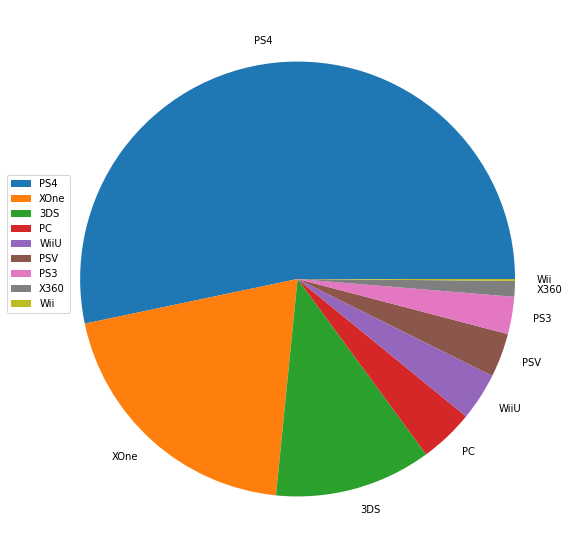

In [18]:
plt.figure(figsize=(10,10))
plt.pie(platform_sales, labels=platform_sales.index)
plt.legend(bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
           labels=platform_sales.index);

Платформы и их прибыльность. В качестве потенциально прибыльных платформ можно выбрать *PS4*, *XOne* и *3DS*.

<AxesSubplot:>

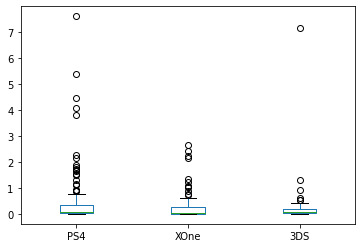

In [19]:
PS4 = games.query('platform == "PS4"')['total_sales']
XOne = games.query('platform == "XOne"')['total_sales']
_3DS = games.query('platform == "3DS"')['total_sales']
PC = games.query('platform == "PC"')['total_sales']
WiiU = games.query('platform == "WiiU"')['total_sales']
PSV = games.query('platform == "PSV"')['total_sales']
PS3 = games.query('platform == "PS3"')['total_sales']
X360 = games.query('platform == "X360"')['total_sales']
Wii = games.query('platform == "Wii"')['total_sales']

platforms_boxplot = pd.DataFrame({
    'PS4': PS4,
    'XOne': XOne,
    '3DS': _3DS,
    'PC': PC,
    'WiiU': WiiU,
    'PSV': PSV,
    'PS3': PS3,
    'X360': X360,
    'Wii': Wii
})

platforms_boxplot[['PS4', 'XOne', '3DS']].plot(kind='box')

Построен график 'ящик с усами' по глобальным продажам игр в разбивке по трем платформам (PS4, XOne, 3DS).

<div class="alert alert-warning">
    
**Артём:** 👉👉👉 К сожалению, на этом боксплоте видны только выбросы, и совсем не видны медиана и 75% квантиль. Отрежь выбросы и все будет отлично.

</div>

Проверим, как влияют на продажи отзывы пользователей и критиков. В качестве платформы для анализа возьмем XOne.

In [20]:
xone_scores = games.query('platform == "XOne"')

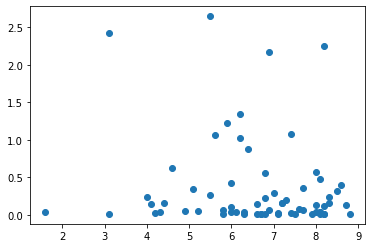

In [21]:
plt.scatter(xone_scores.user_score, xone_scores.total_sales);

In [22]:
xone_scores['user_score'].corr(xone_scores['total_sales'])

-0.1303029975447243

Зависимости между оценкой пользователей и продажами нет.

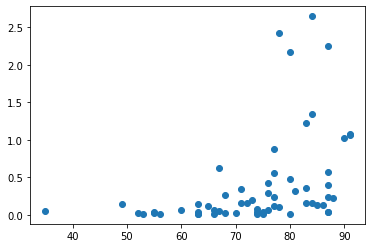

In [23]:
plt.scatter(xone_scores.critic_score, xone_scores.total_sales);

In [24]:
xone_scores['critic_score'].corr(xone_scores['total_sales'])

0.41200525431688656

Судя по коэффициенту корреляции 0.4, присутствует слабая обратная зависимость: чем больше рейтинг критиков, тем больше суммарных продаж.

In [25]:
genre_sales = games.groupby(by=['genre'])['total_sales'].sum().sort_values(ascending=False)
genre_sales

genre
Shooter         38.22
Action          30.11
Sports          23.49
Role-Playing    18.18
Fighting         4.47
Adventure        3.82
Platform         3.23
Racing           2.79
Misc             2.60
Simulation       1.89
Strategy         1.13
Puzzle           0.01
Name: total_sales, dtype: float64

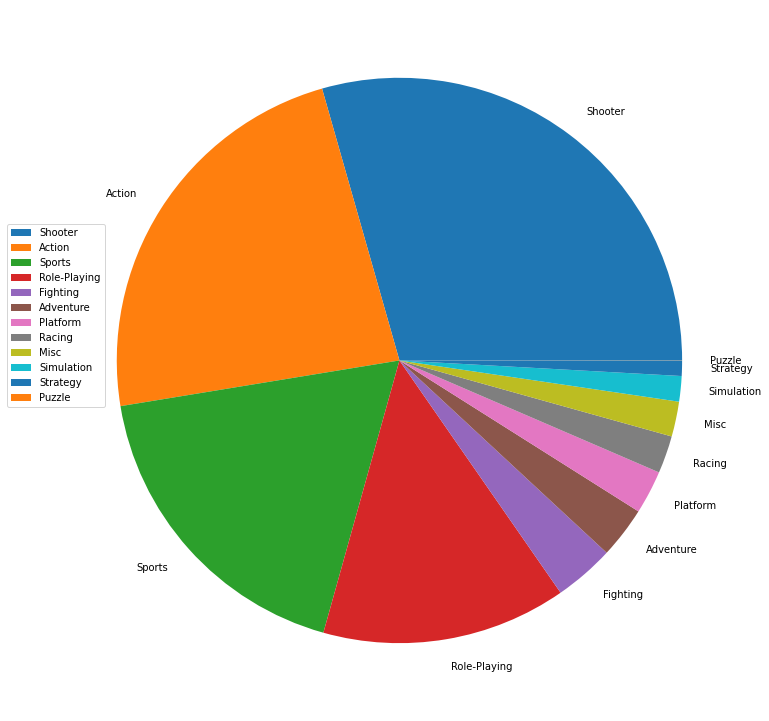

In [26]:
plt.figure(figsize=(13, 13))
plt.pie(genre_sales, 
        labels=genre_sales.index);
plt.legend(bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
           labels=genre_sales.index);

Выше представлена диаграмма самых прибыльных жанров. Прибыльные жанры - *Shooter*, *Action*, *Sports* и *Role-Playing*. Самые низкие продажи у жанра *Puzzle*.

# Четвертый шаг. Составление портрета пользователя для каждого региона.

**Определение портрета пользователя NA-региона.**

In [27]:
na_pltf_sales = pd.pivot_table(games, 
                           values='na_sales', 
                           index='platform', 
                           aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
na_pltf_sales

,na_sales
platform,
PS4,21.49
XOne,14.27
3DS,4.14
WiiU,2.10
PC,1.36


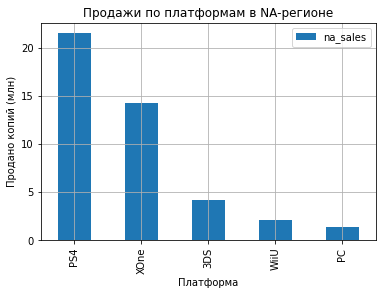

In [28]:
na_pltf_sales.plot(kind='bar',
               title='Продажи по платформам в NA-регионе',
               ylabel='Продано копий (млн)',
               xlabel='Платформа',
               grid=True);

In [29]:
na_gnr_sales = pd.pivot_table(games, 
                              values='na_sales', 
                              index='genre', 
                              aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
na_gnr_sales

,na_sales
genre,
Shooter,16.24
Action,9.29
Sports,7.54
Role-Playing,5.89
Fighting,1.84


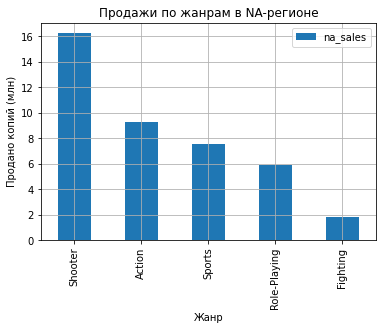

In [30]:
na_gnr_sales.plot(kind='bar',
               title='Продажи по жанрам в NA-регионе',
               ylabel='Продано копий (млн)',
               xlabel='Жанр',
               grid=True);

In [31]:
na_rtng_sales = pd.pivot_table(games, 
                               values='na_sales', 
                               index='rating', 
                               aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
na_rtng_sales

,na_sales
rating,
M,15.67
T,8.95
E,7.97
E10+,3.81


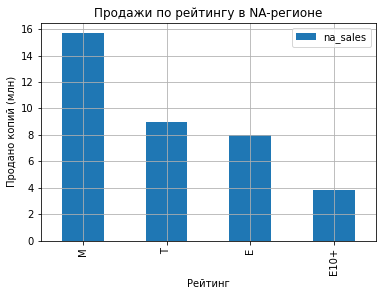

In [32]:
na_rtng_sales.plot(kind='bar',
               title='Продажи по рейтингу в NA-регионе',
               ylabel='Продано копий (млн)',
               xlabel='Рейтинг',
               grid=True);

В **NA-регионе** большего всего продаж у платформы *PS4*, самый популярный жанр - *Shooter*, самый частый рейтинг у игр - *M*.

**Определение портрета пользователя EU-региона.**

In [33]:
eu_pltf_sales = pd.pivot_table(games, values='eu_sales', 
                               index='platform', 
                               aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
eu_pltf_sales

,eu_sales
platform,
PS4,31.78
XOne,9.63
PC,3.53
3DS,2.33
WiiU,1.48


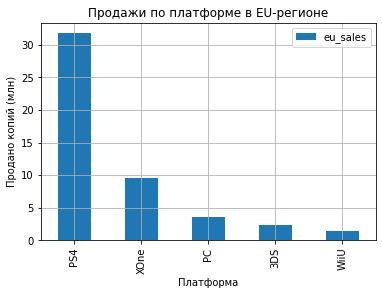

In [34]:
eu_pltf_sales.plot(kind='bar',
               title='Продажи по платформе в EU-регионе',
               ylabel='Продано копий (млн)',
               xlabel='Платформа',
               grid=True);

In [35]:
eu_gnr_sales = pd.pivot_table(games, 
                              values='eu_sales', 
                              index='genre', 
                              aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
eu_gnr_sales

,eu_sales
genre,
Shooter,15.90
Sports,12.01
Action,10.68
Role-Playing,4.28
Racing,1.77


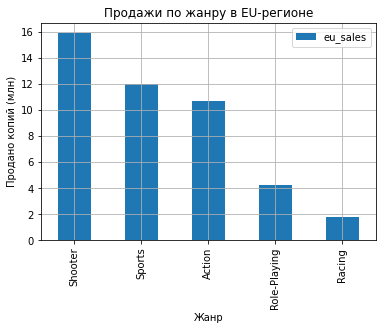

In [36]:
eu_gnr_sales.plot(kind='bar',
               title='Продажи по жанру в EU-регионе',
               ylabel='Продано копий (млн)',
               xlabel='Жанр',
               grid=True);

In [37]:
eu_rtng_sales = pd.pivot_table(games, 
                               values='eu_sales', 
                               index='rating', 
                               aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
eu_rtng_sales

,eu_sales
rating,
M,16.54
E,13.61
T,9.79
E10+,3.81


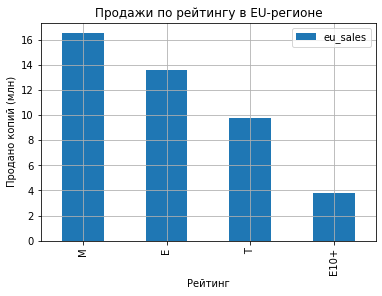

In [38]:
eu_rtng_sales.plot(kind='bar',
               title='Продажи по рейтингу в EU-регионе',
               ylabel='Продано копий (млн)',
               xlabel='Рейтинг',
               grid=True);

В **EU-регионе** большего всего продаж у платформы *PS4*, самый популярный жанр - *Shooter*, самый частый рейтинг у игр - *M*.

**Определение портрета пользователя JP-региона.**

In [39]:
jp_pltf_sales = pd.pivot_table(games, 
                               values='jp_sales', 
                               index='platform', 
                               aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
jp_pltf_sales

,jp_sales
platform,
3DS,8.03
PS4,5.74
PSV,3.56
PS3,1.30
WiiU,0.67


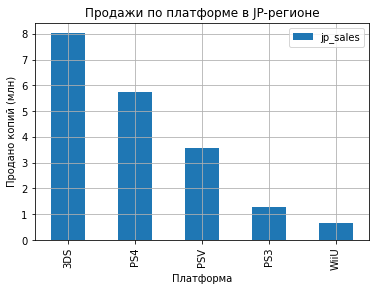

In [40]:
jp_pltf_sales.plot(kind='bar',
               title='Продажи по платформе в JP-регионе',
               ylabel='Продано копий (млн)',
               xlabel='Платформа',
               grid=True);

In [41]:
jp_gnr_sales = pd.pivot_table(games, 
                              values='jp_sales', 
                              index='genre', 
                              aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
jp_gnr_sales

,jp_sales
genre,
Action,7.07
Role-Playing,6.61
Adventure,1.18
Shooter,1.06
Misc,1.04


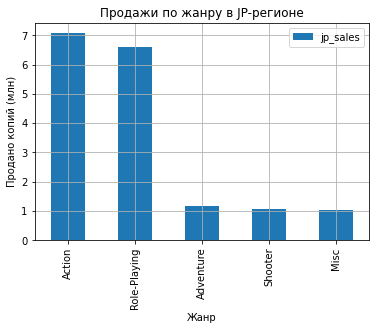

In [42]:
jp_gnr_sales.plot(kind='bar',
               title='Продажи по жанру в JP-регионе',
               ylabel='Продано копий (млн)',
               xlabel='Жанр',
               grid=True);

In [43]:
jp_rtng_sales = pd.pivot_table(games, 
                               values='jp_sales', 
                               index='rating', 
                               aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
jp_rtng_sales

,jp_sales
rating,
T,2.27
M,1.20
E,1.07
E10+,0.45


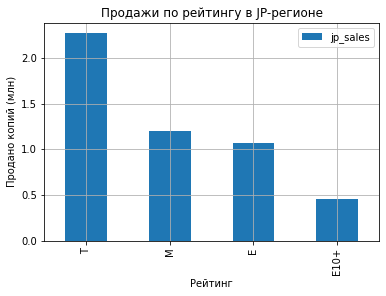

In [44]:
jp_rtng_sales.plot(kind='bar',
               title='Продажи по рейтингу в JP-регионе',
               ylabel='Продано копий (млн)',
               xlabel='Рейтинг',
               grid=True);

В **JP-регионе** большего всего продаж у платформы *3DS*, самый популярный жанр - *Action*, самый частый рейтинг у игр - *T*.

# Пятый шаг. Проверка гипотез.

### 📊 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**Гипотеза №1:**

H₀: средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу PС-платформы.

H₁: средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу PС-платформы.

In [45]:
xone_rating = games.query('platform == "XOne"')['user_score']
pc_rating = games.query('platform == "PC"')['user_score']
 
alpha = 0.05

results = st.ttest_ind(xone_rating.dropna(), 
                       pc_rating.dropna(), 
                       equal_var=False)

print('p-значение:', results.pvalue)
 
if results.pvalue > alpha:
    print('Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу PС-платформы.')
    
else:
    print('Средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу PС-платформы.')

p-значение: 0.3516273078893254
Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу PС-платформы.



### 📊 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Гипотеза №2:**
    
H₀: средний пользовательский рейтинг жанра *Action* равен среднему пользовательскому рейтингу жанра *Sports*.

H₁: средний пользовательский рейтинг жанра *Action* не равен среднему пользовательскому рейтингу жанра *Sports*.

In [46]:
action_rating = games.query('genre == "Action"')['user_score']
sports_rating = games.query('genre == "Sports"')['user_score']
 
alpha = 0.05

results = st.ttest_ind(action_rating.dropna(), 
                       sports_rating.dropna(), 
                       equal_var=False)

print('p-значение:', results.pvalue)
 
if results.pvalue > alpha:
    print('Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.')
    
else:
    print('Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.')

p-значение: 0.002025023028063322
Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.


# Шестой шаг. Выводы.

В ходе работы была проведена оптимизация датасета - названия столбцов приведены к нижнему регистру, данные в столбцах были преобразованы в нужный тип. 

Была удалена небольшая часть датасета, пропуски заполнять нецелесообразно. Был создан отдельный столбец с суммарными продажами во всех регионах. *Доказана прямая зависимость между отзывами критиков и продажами игр*. Был выявлен жизненный цикл игровых платформ - **два или три года**; исходя из этого был выбран актуальный период для анализа - **2015 и 2016 года**. Самая продаваемая за все время платформа - **PS2**, самая продаваемая за актуальный период - **PS4**.

Были составлены портреты пользователей каждого из регионов **(NA, EU, JP)**. В каждом из этих регионов были выделены самые продаваемые платформы и жанры. *JP-регион очень сильно отличается по характеристикам от двух остальных исследуемых регионов.*

Обе заданные в пятом шаге гипотезы были проверены - **средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу PС-платформы** и **средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports**.